In [2]:
#Libraries
from sklearn.datasets import fetch_openml
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.datasets import  fetch_california_housing

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [3]:
df = pd.read_csv("baby-weights-dataset.csv") 

In [4]:
df


,ID,SEX,MARITAL,FAGE,GAINED,VISITS,MAGE,FEDUC,MEDUC,TOTALP,...,HYPERCH,HYPERPR,ECLAMP,CERVIX,PINFANT,PRETERM,RENAL,RHSEN,UTERINE,BWEIGHT
0,2001,2,1,33,26.0,10,34,12.0,4,2,...,0,0,0,0,0,0,0,0,0,4.3750
1,2002,2,2,19,40.0,10,18,11.0,12,1,...,0,0,0,0,0,0,0,0,0,6.9375
2,2003,2,1,33,16.0,14,31,16.0,16,2,...,0,0,0,0,0,0,0,0,0,8.5000
3,2004,1,1,25,40.0,15,28,12.0,12,3,...,0,0,0,0,0,0,0,0,0,8.5000
4,2005,1,2,21,60.0,13,20,12.0,14,2,...,0,1,0,0,0,0,0,0,0,9.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101395,103396,1,2,36,0.0,9,34,3.0,12,4,...,0,0,0,0,0,0,0,0,0,9.1250
101396,103397,2,2,21,39.0,11,19,12.0,9,2,...,0,0,0,0,0,0,0,0,0,7.3750
101397,103398,2,1,27,37.0,15,22,12.0,12,2,...,0,0,0,0,0,0,0,0,0,7.5000
101398,103399,1,1,27,26.0,12,24,12.0,14,1,...,0,0,0,0,0,0,0,0,0,7.6250


In [5]:
df.dtypes

ID            int64
SEX           int64
MARITAL       int64
FAGE          int64
GAINED      float64
VISITS        int64
MAGE          int64
FEDUC       float64
MEDUC         int64
TOTALP        int64
BDEAD         int64
TERMS         int64
LOUTCOME      int64
WEEKS       float64
RACEMOM       int64
RACEDAD       int64
HISPMOM      object
HISPDAD      object
CIGNUM      float64
DRINKNUM      int64
ANEMIA        int64
CARDIAC       int64
ACLUNG        int64
DIABETES      int64
HERPES        int64
HYDRAM      float64
HEMOGLOB      int64
HYPERCH       int64
HYPERPR       int64
ECLAMP        int64
CERVIX        int64
PINFANT       int64
PRETERM       int64
RENAL         int64
RHSEN         int64
UTERINE       int64
BWEIGHT     float64
dtype: object

In [6]:
df["HISPMOM"].unique ()

array(['M', 'N', 'S', 'P', 'U', 'C', 'O'], dtype=object)

In [7]:
df["HISPDAD"].unique ()

array(['M', 'N', 'S', 'O', 'P', 'C', 'U'], dtype=object)

In [8]:
mapping = {"M": 1, "N": 2, "S": 3, "P": 4, "P": 5, "U": 6, "O": 7}

df["HISPMOM"] = df["HISPMOM"].map(mapping)
df["HISPDAD"] = df["HISPDAD"].map(mapping)

print(df)

            ID  SEX  MARITAL  FAGE  GAINED  VISITS  MAGE  FEDUC  MEDUC  \
0         2001    2        1    33    26.0      10    34   12.0      4   
1         2002    2        2    19    40.0      10    18   11.0     12   
2         2003    2        1    33    16.0      14    31   16.0     16   
3         2004    1        1    25    40.0      15    28   12.0     12   
4         2005    1        2    21    60.0      13    20   12.0     14   
...        ...  ...      ...   ...     ...     ...   ...    ...    ...   
101395  103396    1        2    36     0.0       9    34    3.0     12   
101396  103397    2        2    21    39.0      11    19   12.0      9   
101397  103398    2        1    27    37.0      15    22   12.0     12   
101398  103399    1        1    27    26.0      12    24   12.0     14   
101399  103400    1        2    20    31.0      15    17   12.0     11   

        TOTALP  ...  HYPERCH  HYPERPR  ECLAMP  CERVIX  PINFANT  PRETERM  \
0            2  ...        0        

In [9]:
df.dtypes

ID            int64
SEX           int64
MARITAL       int64
FAGE          int64
GAINED      float64
VISITS        int64
MAGE          int64
FEDUC       float64
MEDUC         int64
TOTALP        int64
BDEAD         int64
TERMS         int64
LOUTCOME      int64
WEEKS       float64
RACEMOM       int64
RACEDAD       int64
HISPMOM     float64
HISPDAD     float64
CIGNUM      float64
DRINKNUM      int64
ANEMIA        int64
CARDIAC       int64
ACLUNG        int64
DIABETES      int64
HERPES        int64
HYDRAM      float64
HEMOGLOB      int64
HYPERCH       int64
HYPERPR       int64
ECLAMP        int64
CERVIX        int64
PINFANT       int64
PRETERM       int64
RENAL         int64
RHSEN         int64
UTERINE       int64
BWEIGHT     float64
dtype: object

In [10]:
df.isnull ().sum()

ID            0
SEX           0
MARITAL       0
FAGE          0
GAINED        1
VISITS        0
MAGE          0
FEDUC         1
MEDUC         0
TOTALP        0
BDEAD         0
TERMS         0
LOUTCOME      0
WEEKS         1
RACEMOM       0
RACEDAD       0
HISPMOM     185
HISPDAD     186
CIGNUM        1
DRINKNUM      0
ANEMIA        0
CARDIAC       0
ACLUNG        0
DIABETES      0
HERPES        0
HYDRAM        1
HEMOGLOB      0
HYPERCH       0
HYPERPR       0
ECLAMP        0
CERVIX        0
PINFANT       0
PRETERM       0
RENAL         0
RHSEN         0
UTERINE       0
BWEIGHT       0
dtype: int64

In [11]:
df = df.dropna ()

In [12]:
df1= pd.read_csv("judge-without-labels.csv")

In [13]:
df1

,ID,INST,RPLACE,RCOUNTY,PLURAL,BDATE,BMONTH,BDAY,BYEAR,SEX,...,MOTHERTR,IANEMIA,BINJURY,FAS,HYALINE,ASPIRATE,VENTLESS,VENTMORE,ISEIZURE,OTHINF
0,1,1,5400,54,1,3/25/08,3,25,2008,2,...,2,0,0,0,0,0,0,0,0,0
1,2,1,4195,41,1,9/3/08,9,3,2008,1,...,2,0,0,0,0,0,0,0,0,0
2,3,1,8200,82,1,9/25/08,9,25,2008,1,...,2,0,0,0,0,0,0,0,0,0
3,4,1,4500,45,1,9/3/08,9,3,2008,1,...,2,0,0,0,0,0,0,0,0,0
4,5,1,9200,92,1,8/22/08,8,22,2008,2,...,2,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1996,1,8370,83,1,9/29/08,9,29,2008,2,...,2,0,0,0,0,0,0,0,0,0
1996,1997,1,3390,33,1,12/11/08,12,11,2008,1,...,2,0,0,0,0,0,0,0,0,0
1997,1998,1,3200,32,1,9/12/08,9,12,2008,1,...,2,0,0,0,0,0,0,0,0,0
1998,1999,1,9890,98,1,10/13/08,10,13,2008,2,...,2,0,0,0,0,0,0,0,0,0


In [14]:
df1.isnull ().sum()

ID          0
INST        0
RPLACE      0
RCOUNTY     0
PLURAL      0
           ..
ASPIRATE    0
VENTLESS    0
VENTMORE    0
ISEIZURE    0
OTHINF      0
Length: 124, dtype: int64

In [15]:
common_columns = df.columns.intersection(df1.columns)

# Keep only the common columns in df2
df1 = df1[common_columns]

df1


,ID,SEX,MARITAL,FAGE,GAINED,VISITS,MAGE,FEDUC,MEDUC,TOTALP,...,HEMOGLOB,HYPERCH,HYPERPR,ECLAMP,CERVIX,PINFANT,PRETERM,RENAL,RHSEN,UTERINE
0,1,2,2,99,23,8,41,99,16,2,...,0,0,0,0,0,0,0,0,0,0
1,2,1,2,99,35,15,21,99,9,2,...,0,0,0,0,0,0,1,0,0,0
2,3,1,2,24,25,10,23,10,6,3,...,0,0,0,0,0,0,0,0,0,0
3,4,1,2,22,22,13,26,14,14,5,...,0,0,0,0,0,0,0,0,0,0
4,5,2,1,26,25,18,24,16,13,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1996,2,1,31,22,11,31,14,17,4,...,0,0,0,0,0,0,0,0,0,0
1996,1997,1,2,99,34,18,21,99,12,1,...,0,0,0,0,0,0,0,0,0,0
1997,1998,1,1,29,24,9,27,14,12,3,...,0,0,0,0,0,0,0,0,0,0
1998,1999,2,1,30,29,15,27,14,14,3,...,0,0,0,0,0,1,0,0,0,0


In [16]:
df1.isnull().sum()

ID          0
SEX         0
MARITAL     0
FAGE        0
GAINED      0
VISITS      0
MAGE        0
FEDUC       0
MEDUC       0
TOTALP      0
BDEAD       0
TERMS       0
LOUTCOME    0
WEEKS       0
RACEMOM     0
RACEDAD     0
HISPMOM     0
HISPDAD     0
CIGNUM      0
DRINKNUM    0
ANEMIA      0
CARDIAC     0
ACLUNG      0
DIABETES    0
HERPES      0
HYDRAM      0
HEMOGLOB    0
HYPERCH     0
HYPERPR     0
ECLAMP      0
CERVIX      0
PINFANT     0
PRETERM     0
RENAL       0
RHSEN       0
UTERINE     0
dtype: int64

In [17]:
target_column= "BWEIGHT"

features = df.drop(columns =["BWEIGHT"])

target = df[target_column]

In [19]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=0)

In [20]:
X_train.head()

,ID,SEX,MARITAL,FAGE,GAINED,VISITS,MAGE,FEDUC,MEDUC,TOTALP,...,HEMOGLOB,HYPERCH,HYPERPR,ECLAMP,CERVIX,PINFANT,PRETERM,RENAL,RHSEN,UTERINE
75635,77636,1,2,39,29.0,14,35,15.0,16,1,...,0,0,0,0,0,0,0,0,0,0
98864,100865,1,1,29,37.0,14,28,12.0,12,2,...,0,1,0,0,0,0,0,0,0,0
37643,39644,2,2,22,25.0,10,23,6.0,6,3,...,0,0,0,0,0,0,0,0,0,0
57367,59368,1,2,24,37.0,10,27,14.0,14,2,...,0,0,0,0,0,0,0,0,0,0
74638,76639,1,1,35,27.0,15,34,14.0,16,2,...,0,0,1,0,0,0,0,0,0,0


In [21]:
y_train.head()

75635    6.0625
98864    8.4375
37643    8.6250
57367    6.5625
74638    5.3125
Name: BWEIGHT, dtype: float64

In [22]:
from sklearn.neighbors import KNeighborsRegressor

knn_regressor = KNeighborsRegressor(n_neighbors=10)

In [23]:
knn_regressor.fit(X_train, y_train)


KNeighborsRegressor(n_neighbors=10)

In [24]:
print(f"The accuracy of the model is {knn_regressor.score(X_test, y_test)*100: .2f}%")

Exception in thread Thread-6 (_readerthread):
Traceback (most recent call last):
  File "c:\Users\lored\miniconda3\Lib\threading.py", line 1073, in _bootstrap_inner
    self.run()
  File "c:\Users\lored\miniconda3\Lib\site-packages\ipykernel\ipkernel.py", line 766, in run_closure
    _threading_Thread_run(self)
  File "c:\Users\lored\miniconda3\Lib\threading.py", line 1010, in run
    self._target(*self._args, **self._kwargs)
  File "c:\Users\lored\miniconda3\Lib\subprocess.py", line 1599, in _readerthread
    buffer.append(fh.read())
                  ^^^^^^^^^
  File "c:\Users\lored\miniconda3\Lib\encodings\cp1252.py", line 23, in decode
    return codecs.charmap_decode(input,self.errors,decoding_table)[0]
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
UnicodeDecodeError: 'charmap' codec can't decode byte 0x81 in position 3: character maps to <undefined>
c:\Users\lored\miniconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could no

The accuracy of the model is -2.67%


In [25]:
corr=np.abs(df.corr())

mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(100, 200))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mask,  vmax=1,square=True, linewidths=.5, cbar_kws={"shrink": .5},annot = corr)

plt.show()

In [26]:
normalizer = MinMaxScaler()

In [27]:
normalizer.fit(X_train)

MinMaxScaler()

In [28]:
X_train_norm = normalizer.transform(X_train)

X_test_norm = normalizer.transform(X_test)

In [29]:
X_train_norm = pd.DataFrame(X_train_norm, columns=X_train.columns, index=X_train.index )
X_train_norm.head()

,ID,SEX,MARITAL,FAGE,GAINED,VISITS,MAGE,FEDUC,MEDUC,TOTALP,...,HEMOGLOB,HYPERCH,HYPERPR,ECLAMP,CERVIX,PINFANT,PRETERM,RENAL,RHSEN,UTERINE
75635,0.745922,0.0,1.0,0.416667,0.295918,0.285714,0.571429,0.882353,0.941176,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
98864,0.975009,0.0,0.0,0.250000,0.377551,0.285714,0.404762,0.705882,0.705882,0.052632,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
37643,0.371240,1.0,1.0,0.133333,0.255102,0.204082,0.285714,0.352941,0.352941,0.105263,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
57367,0.565761,0.0,1.0,0.166667,0.377551,0.204082,0.380952,0.823529,0.823529,0.052632,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
74638,0.736089,0.0,0.0,0.350000,0.275510,0.306122,0.547619,0.823529,0.941176,0.052632,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
X_test_norm = pd.DataFrame(X_test_norm, columns=X_test.columns, index=X_test.index)
X_test_norm.head()

,ID,SEX,MARITAL,FAGE,GAINED,VISITS,MAGE,FEDUC,MEDUC,TOTALP,...,HEMOGLOB,HYPERCH,HYPERPR,ECLAMP,CERVIX,PINFANT,PRETERM,RENAL,RHSEN,UTERINE
10503,0.103582,1.0,0.0,0.250000,0.255102,0.367347,0.380952,0.705882,0.705882,0.052632,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
47485,0.468303,0.0,1.0,0.383333,0.183673,0.285714,0.476190,0.294118,0.529412,0.052632,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
95008,0.936981,0.0,1.0,0.233333,0.367347,0.163265,0.380952,0.470588,0.705882,0.052632,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
83191,0.820440,1.0,0.0,0.333333,0.244898,0.244898,0.500000,1.000000,1.000000,0.105263,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
44393,0.437809,0.0,1.0,0.266667,0.081633,0.122449,0.285714,0.529412,0.352941,0.105263,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
knn = KNeighborsRegressor(n_neighbors=10)

In [32]:
knn.fit(X_train_norm, y_train)

KNeighborsRegressor(n_neighbors=10)

In [33]:
print(f"The R2 of the model on the TEST set is: {knn.score(X_test_norm, y_test): .2f}")

The R2 of the model on the TEST set is:  0.26


In [34]:
X_train_norm_updated = X_train_norm.drop(columns=["RHSEN", "RENAL", "HEMOGLOB", "HERPES", "DIABETES", "ACLUNG", "CARDIAC", "ANEMIA", "DRINKNUM", "HISPMOM", "HISPDAD", "TOTALP"], axis=1)

In [35]:
y_train_updated = y_train.drop(columns=["RHSEN", "RENAL", "HEMOGLOB", "HERPES", "DIABETES", "ACLUNG", "CARDIAC", "ANEMIA", "DRINKNUM", "HISPMOM", "HISPDAD", "TOTALP"], axis=1)

In [36]:
knn.fit(X_train_norm_updated, y_train_updated)

KNeighborsRegressor(n_neighbors=10)

In [37]:
X_test_norm_updated = X_test_norm.drop(columns=["RHSEN", "RENAL", "HEMOGLOB", "HERPES", "DIABETES", "ACLUNG", "CARDIAC", "ANEMIA", "DRINKNUM", "HISPMOM", "HISPDAD", "TOTALP"], axis=1)

In [38]:
y_test_updated = y_test.drop(columns=["RHSEN", "RENAL", "HEMOGLOB", "HERPES", "DIABETES", "ACLUNG", "CARDIAC", "ANEMIA", "DRINKNUM", "HISPMOM", "HISPDAD", "TOTALP"], axis=1)

In [39]:
print(f"The R2 of the model on the TEST set is: {knn.score(X_test_norm_updated, y_test_updated): .2f}")

The R2 of the model on the TEST set is:  0.29


In [40]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import pandas as pd

X = add_constant(df)  # Add constant column for intercept
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif)

    Variable         VIF
0      const  384.729632
1         ID    1.000496
2        SEX    1.017915
3    MARITAL    1.331775
4       FAGE    2.316019
5     GAINED    1.091315
6     VISITS    1.113852
7       MAGE    2.863246
8      FEDUC    2.350821
9      MEDUC    2.539734
10    TOTALP    3.486601
11     BDEAD    1.053407
12     TERMS    2.020104
13  LOUTCOME    1.839932
14     WEEKS    1.548637
15   RACEMOM    2.414393
16   RACEDAD    2.414421
17   HISPMOM    1.374256
18   HISPDAD    1.375134
19    CIGNUM    1.048060
20  DRINKNUM    1.002257
21    ANEMIA    1.007874
22   CARDIAC    1.002409
23    ACLUNG    1.006245
24  DIABETES    1.030718
25    HERPES    1.003949
26    HYDRAM    1.006175
27  HEMOGLOB    1.002961
28   HYPERCH    1.020013
29   HYPERPR    1.037905
30    ECLAMP    1.013450
31    CERVIX    1.017300
32   PINFANT    1.012026
33   PRETERM    1.022545
34     RENAL    1.001373
35     RHSEN    1.001401
36   UTERINE    1.003985
37   BWEIGHT    1.632550


In [41]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(df):
    X = sm.add_constant(df)
    
    # Calculate VIF for each feature
    vif_data = pd.DataFrame()
    vif_data["Feature"] = df.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i+1) for i in range(df.shape[1])]
    
    return vif_data

def filter_vif_columns(df, threshold=2.0):
    vif_data = calculate_vif(df)
    
    # Filter out columns with VIF greater than the threshold
    features_to_keep = vif_data[vif_data["VIF"] < threshold]["Feature"]
    
    # Return the dataframe with only the columns with VIF less than the threshold
    df_filtered = df[features_to_keep]
    
    return df_filtered, vif_data

df_filtered, vif_info = filter_vif_columns(df, threshold=2.0)

print("Filtered DataFrame:")
print(df_filtered)
print("\nVIF Information:")
print(vif_info)

Filtered DataFrame:
            ID  SEX  MARITAL  GAINED  VISITS  BDEAD  LOUTCOME  WEEKS  HISPMOM  \
0         2001    2        1    26.0      10      0         1   35.0      1.0   
1         2002    2        2    40.0      10      0         9   41.0      2.0   
2         2003    2        1    16.0      14      0         1   39.0      2.0   
3         2004    1        1    40.0      15      0         1   38.0      2.0   
4         2005    1        2    60.0      13      0         1   40.0      2.0   
...        ...  ...      ...     ...     ...    ...       ...    ...      ...   
101395  103396    1        2     0.0       9      0         1   42.0      1.0   
101396  103397    2        2    39.0      11      0         1   36.0      2.0   
101397  103398    2        1    37.0      15      0         1   39.0      2.0   
101398  103399    1        1    26.0      12      0         9   41.0      2.0   
101399  103400    1        2    31.0      15      0         9   39.0      2.0   

       

In [42]:
df_filtered

,ID,SEX,MARITAL,GAINED,VISITS,BDEAD,LOUTCOME,WEEKS,HISPMOM,HISPDAD,...,HYPERCH,HYPERPR,ECLAMP,CERVIX,PINFANT,PRETERM,RENAL,RHSEN,UTERINE,BWEIGHT
0,2001,2,1,26.0,10,0,1,35.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,4.3750
1,2002,2,2,40.0,10,0,9,41.0,2.0,2.0,...,0,0,0,0,0,0,0,0,0,6.9375
2,2003,2,1,16.0,14,0,1,39.0,2.0,2.0,...,0,0,0,0,0,0,0,0,0,8.5000
3,2004,1,1,40.0,15,0,1,38.0,2.0,2.0,...,0,0,0,0,0,0,0,0,0,8.5000
4,2005,1,2,60.0,13,0,1,40.0,2.0,2.0,...,0,1,0,0,0,0,0,0,0,9.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101395,103396,1,2,0.0,9,0,1,42.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,9.1250
101396,103397,2,2,39.0,11,0,1,36.0,2.0,2.0,...,0,0,0,0,0,0,0,0,0,7.3750
101397,103398,2,1,37.0,15,0,1,39.0,2.0,2.0,...,0,0,0,0,0,0,0,0,0,7.5000
101398,103399,1,1,26.0,12,0,9,41.0,2.0,2.0,...,0,0,0,0,0,0,0,0,0,7.6250


In [43]:
target_column= "BWEIGHT"

features = df_filtered.drop(columns =["BWEIGHT"])

target = df_filtered[target_column]

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=0)

In [44]:
normalizer = MinMaxScaler()

In [45]:
normalizer.fit(X_train)


MinMaxScaler()

In [46]:
X_train_norm1 = normalizer.transform(X_train)

X_test_norm1 = normalizer.transform(X_test)

In [47]:
X_train_norm1 = pd.DataFrame(X_train_norm1, columns=X_train.columns, index=X_train.index )
X_train_norm1.head()
X_test_norm1 = pd.DataFrame(X_test_norm1, columns=X_test.columns, index=X_test.index)
X_test_norm1.head()

,ID,SEX,MARITAL,GAINED,VISITS,BDEAD,LOUTCOME,WEEKS,HISPMOM,HISPDAD,...,HEMOGLOB,HYPERCH,HYPERPR,ECLAMP,CERVIX,PINFANT,PRETERM,RENAL,RHSEN,UTERINE
10503,0.103582,1.0,0.0,0.255102,0.367347,0.0,0.0,0.777778,0.166667,0.166667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
47485,0.468303,0.0,1.0,0.183673,0.285714,0.0,0.0,0.851852,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
95008,0.936981,0.0,1.0,0.367347,0.163265,0.0,0.0,0.777778,0.166667,0.166667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
83191,0.820440,1.0,0.0,0.244898,0.244898,0.0,0.0,0.814815,0.166667,0.166667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
44393,0.437809,0.0,1.0,0.081633,0.122449,0.0,0.0,0.777778,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [48]:
lin_reg = LinearRegression()

In [49]:
lin_reg.fit(X_train_norm1, y_train)

LinearRegression()

In [50]:
pred = lin_reg.predict(X_test_norm1)

print(f"MAE {mean_absolute_error(pred, y_test): .2f}") 
print(f"RMSE, {mean_squared_error(pred, y_test, squared=False): .2f}")
print(f"R2 score, {lin_reg.score(X_test_norm1, y_test): .2f}")

MAE  0.81
RMSE,  1.04
R2 score,  0.38


c:\Users\lored\miniconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [51]:
lin_reg_coef = {feature : coef for feature, coef in zip(X_train_norm1.columns, lin_reg.coef_)}
lin_reg_coef

{'ID': -0.0008825127576284111,
 'SEX': -0.26405106973517656,
 'MARITAL': -0.21482527996064588,
 'GAINED': 1.261025834311767,
 'VISITS': 0.6107407968464824,
 'BDEAD': -0.6913637249487681,
 'LOUTCOME': -0.23837935137931904,
 'WEEKS': 7.7192282823017715,
 'HISPMOM': -0.2768654697561266,
 'HISPDAD': -0.1977005038341135,
 'CIGNUM': -1.9455939960493345,
 'DRINKNUM': -0.008596301702740781,
 'ANEMIA': -0.023968476157925314,
 'CARDIAC': 0.013374811023885554,
 'ACLUNG': -0.04103028577232922,
 'DIABETES': 0.2767035742249,
 'HERPES': 0.018934318923280027,
 'HYDRAM': -0.32395015784774894,
 'HEMOGLOB': -0.1773992294945293,
 'HYPERCH': -0.20742818034461163,
 'HYPERPR': -0.34822363280602364,
 'ECLAMP': -0.6725190113946856,
 'CERVIX': -0.4538602881378252,
 'PINFANT': 0.9786608921312592,
 'PRETERM': -0.43086825599165723,
 'RENAL': -0.09338833680620484,
 'RHSEN': 0.04863202439278005,
 'UTERINE': -0.3444347102177114}

In [52]:
tree = DecisionTreeRegressor(max_depth=10)

In [53]:
tree.fit(X_train_norm1, y_train)

DecisionTreeRegressor(max_depth=10)

In [54]:
X_train_norm1

,ID,SEX,MARITAL,GAINED,VISITS,BDEAD,LOUTCOME,WEEKS,HISPMOM,HISPDAD,...,HEMOGLOB,HYPERCH,HYPERPR,ECLAMP,CERVIX,PINFANT,PRETERM,RENAL,RHSEN,UTERINE
75635,0.745922,0.0,1.0,0.295918,0.285714,0.0,1.0,0.851852,0.166667,0.166667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
98864,0.975009,0.0,0.0,0.377551,0.285714,0.0,0.0,0.814815,0.166667,0.166667,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
37643,0.371240,1.0,1.0,0.255102,0.204082,0.0,0.0,0.814815,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
57367,0.565761,0.0,1.0,0.377551,0.204082,0.0,0.0,0.666667,0.166667,0.166667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
74638,0.736089,0.0,0.0,0.275510,0.306122,0.0,0.0,0.592593,0.166667,0.166667,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21318,0.210241,1.0,1.0,0.255102,0.408163,0.0,0.0,0.814815,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
46046,0.454112,0.0,0.0,0.387755,0.387755,0.0,0.0,0.814815,0.166667,0.166667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
42758,0.421685,1.0,0.0,0.561224,0.204082,0.0,0.0,0.851852,0.333333,0.333333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
43716,0.431133,0.0,0.0,0.408163,0.081633,0.0,0.0,0.888889,0.166667,0.166667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [55]:
y_test

10503    6.3750
47485    9.7500
95008    7.2500
83191    7.0625
44393    9.1875
          ...  
71857    5.1250
47549    7.5000
56926    9.0625
70264    5.8750
1933     5.5000
Name: BWEIGHT, Length: 20213, dtype: float64

In [56]:
pred = tree.predict(X_test_norm1)

print(f"MAE, {mean_absolute_error(pred, y_test): .2f}")
print(f"RMSE, {mean_squared_error(pred, y_test, squared=False): .2f}")
print(f"R2 score, {tree.score(X_test_norm1, y_test): .2f}")

MAE,  0.79
RMSE,  1.02
R2 score,  0.40


c:\Users\lored\miniconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [57]:
tree_importance = {feature : importance for feature, importance in zip(X_train_norm.columns, tree.feature_importances_)}
tree_importance

{'ID': 0.01375486598263319,
 'SEX': 0.022774002364847404,
 'MARITAL': 0.015521799468365936,
 'FAGE': 0.03937891975918034,
 'GAINED': 0.009415695583564672,
 'VISITS': 0.0007231345849265475,
 'MAGE': 0.012466133770354637,
 'FEDUC': 0.8378664776692767,
 'MEDUC': 0.005791457475895177,
 'TOTALP': 0.0032226877973809444,
 'BDEAD': 0.020097466471358547,
 'TERMS': 0.000239434760428918,
 'LOUTCOME': 0.0001481761133333058,
 'WEEKS': 6.2027770749282335e-06,
 'RACEMOM': 5.058929911524972e-05,
 'RACEDAD': 0.0020472163940161484,
 'HISPMOM': 0.00021251828528290773,
 'HISPDAD': 0.0008550598542681944,
 'CIGNUM': 0.0,
 'DRINKNUM': 0.0011932499751570328,
 'ANEMIA': 0.004979458369383489,
 'CARDIAC': 0.0007459825047844822,
 'ACLUNG': 0.00035372945775951264,
 'DIABETES': 0.00681874981308011,
 'HERPES': 0.0006415699201947469,
 'HYDRAM': 9.388580907469906e-05,
 'HEMOGLOB': 0.0003529339213191554,
 'HYPERCH': 0.0002486018179430634}

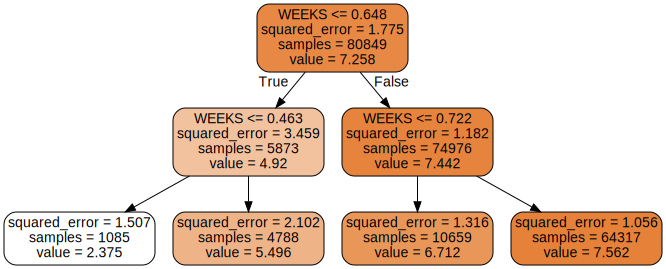

In [58]:
from sklearn.tree import DecisionTreeRegressor, export_graphviz
import graphviz

tree = DecisionTreeRegressor(max_depth=2)
tree.fit(X_train_norm1, y_train)


dot_data = export_graphviz(tree, out_file="tree.dot", filled=True, rounded=True, feature_names=X_train_norm1.columns)

with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [59]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(df):
    X = sm.add_constant(df)
    
    # Calculate VIF for each feature
    vif_data = pd.DataFrame()
    vif_data["Feature"] = df.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i+1) for i in range(df.shape[1])]
    
    return vif_data

def remove_high_vif(df, threshold=2.0):
    vif_data = calculate_vif(df)
    
    # Remove features with VIF greater than the threshold
    while vif_data["VIF"].max() > threshold:
        # Get the feature with the highest VIF
        feature_to_remove = vif_data.loc[vif_data["VIF"].idxmax(), "Feature"]
        print(f"Removing {feature_to_remove} with VIF: {vif_data["VIF"].max()}")
        
        # Drop the feature from the dataframe
        df = df.drop(columns=[feature_to_remove])
        
        # Recalculate VIF after dropping the feature
        vif_data = calculate_vif(df)
    
    return df, vif_data

In [60]:
df_cleaned, final_vif = remove_high_vif(df, threshold=2.0)

print(final_vif)

Removing TOTALP with VIF: 3.4866012122191457
Removing MAGE with VIF: 2.7392858391990207
Removing RACEMOM with VIF: 2.4143559229858838
Removing MEDUC with VIF: 2.38708366460479
     Feature       VIF
0         ID  1.000437
1        SEX  1.017835
2    MARITAL  1.270592
3       FAGE  1.271061
4     GAINED  1.085796
5     VISITS  1.098242
6      FEDUC  1.355685
7      BDEAD  1.016724
8      TERMS  1.088334
9   LOUTCOME  1.210137
10     WEEKS  1.543206
11   RACEDAD  1.026635
12   HISPMOM  1.368305
13   HISPDAD  1.369798
14    CIGNUM  1.041419
15  DRINKNUM  1.002201
16    ANEMIA  1.007641
17   CARDIAC  1.002323
18    ACLUNG  1.006140
19  DIABETES  1.027920
20    HERPES  1.003657
21    HYDRAM  1.006035
22  HEMOGLOB  1.002829
23   HYPERCH  1.018621
24   HYPERPR  1.037139
25    ECLAMP  1.013441
26    CERVIX  1.017179
27   PINFANT  1.010452
28   PRETERM  1.019879
29     RENAL  1.001292
30     RHSEN  1.001280
31   UTERINE  1.003902
32   BWEIGHT  1.626589


In [61]:
df_cleaned

,ID,SEX,MARITAL,FAGE,GAINED,VISITS,FEDUC,BDEAD,TERMS,LOUTCOME,...,HYPERCH,HYPERPR,ECLAMP,CERVIX,PINFANT,PRETERM,RENAL,RHSEN,UTERINE,BWEIGHT
0,2001,2,1,33,26.0,10,12.0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.3750
1,2002,2,2,19,40.0,10,11.0,0,0,9,...,0,0,0,0,0,0,0,0,0,6.9375
2,2003,2,1,33,16.0,14,16.0,0,0,1,...,0,0,0,0,0,0,0,0,0,8.5000
3,2004,1,1,25,40.0,15,12.0,0,0,1,...,0,0,0,0,0,0,0,0,0,8.5000
4,2005,1,2,21,60.0,13,12.0,0,0,1,...,0,1,0,0,0,0,0,0,0,9.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101395,103396,1,2,36,0.0,9,3.0,0,2,1,...,0,0,0,0,0,0,0,0,0,9.1250
101396,103397,2,2,21,39.0,11,12.0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.3750
101397,103398,2,1,27,37.0,15,12.0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.5000
101398,103399,1,1,27,26.0,12,12.0,0,0,9,...,0,0,0,0,0,0,0,0,0,7.6250


In [62]:
target_column= "BWEIGHT"

features = df_cleaned.drop(columns =["BWEIGHT"])

target = df_cleaned[target_column]

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=0)

In [63]:
normalizer = MinMaxScaler()

In [64]:
normalizer.fit(X_train)


MinMaxScaler()

In [65]:
X_train_norm2 = normalizer.transform(X_train)

X_test_norm2 = normalizer.transform(X_test)

In [66]:
X_train_norm2 = pd.DataFrame(X_train_norm2, columns=X_train.columns, index=X_train.index )
X_train_norm2.head()
X_test_norm2 = pd.DataFrame(X_test_norm2, columns=X_test.columns, index=X_test.index)
X_test_norm2.head()

,ID,SEX,MARITAL,FAGE,GAINED,VISITS,FEDUC,BDEAD,TERMS,LOUTCOME,...,HEMOGLOB,HYPERCH,HYPERPR,ECLAMP,CERVIX,PINFANT,PRETERM,RENAL,RHSEN,UTERINE
10503,0.103582,1.0,0.0,0.250000,0.255102,0.367347,0.705882,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
47485,0.468303,0.0,1.0,0.383333,0.183673,0.285714,0.294118,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
95008,0.936981,0.0,1.0,0.233333,0.367347,0.163265,0.470588,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
83191,0.820440,1.0,0.0,0.333333,0.244898,0.244898,1.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
44393,0.437809,0.0,1.0,0.266667,0.081633,0.122449,0.529412,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [67]:
lin_reg = LinearRegression()

In [68]:
lin_reg.fit(X_train_norm2, y_train)

LinearRegression()

In [69]:
pred = lin_reg.predict(X_test_norm2)

#lin_reg.score(X_test_norm, y_test)

print(f"MAE {mean_absolute_error(pred, y_test): .2f}") 
print(f"RMSE, {mean_squared_error(pred, y_test, squared=False): .2f}")
print(f"R2 score, {lin_reg.score(X_test_norm2, y_test): .2f}")

MAE  0.81
RMSE,  1.04
R2 score,  0.38


c:\Users\lored\miniconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [70]:
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor,AdaBoostRegressor, GradientBoostingRegressor

In [71]:
bagging_reg = BaggingRegressor(DecisionTreeRegressor(max_depth=20),
                               n_estimators=100, # number of models to use
                               max_samples = 1000)

In [72]:
bagging_reg.fit(X_train_norm1, y_train)

BaggingRegressor(estimator=DecisionTreeRegressor(max_depth=20),
                 max_samples=1000, n_estimators=100)

In [73]:
pred = bagging_reg.predict(X_test_norm1)

print(f"MAE {mean_absolute_error(pred, y_test): .2f}")
print(f"RMSE {mean_squared_error(pred, y_test, squared=False): .2f}")
print(f"R2 score {bagging_reg.score(X_test_norm1, y_test): .2f}")

MAE  0.78
RMSE  1.00


c:\Users\lored\miniconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


R2 score  0.42


In [74]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [502]:
grid = {"max_leaf_nodes": [500, 1500, 2000],
        "max_depth":[10,30,50]}

In [503]:
dt = DecisionTreeRegressor()

In [504]:
model = GridSearchCV(estimator = dt, param_grid = grid, cv=5, verbose=10) 

In [505]:
model.fit(X_train_norm1, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START max_depth=20, max_leaf_nodes=1000...........................


[CV 1/5; 1/9] END max_depth=20, max_leaf_nodes=1000;, score=0.356 total time=   2.0s
[CV 2/5; 1/9] START max_depth=20, max_leaf_nodes=1000...........................
[CV 2/5; 1/9] END max_depth=20, max_leaf_nodes=1000;, score=0.378 total time=   2.2s
[CV 3/5; 1/9] START max_depth=20, max_leaf_nodes=1000...........................
[CV 3/5; 1/9] END max_depth=20, max_leaf_nodes=1000;, score=0.386 total time=   1.0s
[CV 4/5; 1/9] START max_depth=20, max_leaf_nodes=1000...........................
[CV 4/5; 1/9] END max_depth=20, max_leaf_nodes=1000;, score=0.378 total time=   1.0s
[CV 5/5; 1/9] START max_depth=20, max_leaf_nodes=1000...........................
[CV 5/5; 1/9] END max_depth=20, max_leaf_nodes=1000;, score=0.369 total time=   1.0s
[CV 1/5; 2/9] START max_depth=20, max_leaf_nodes=2000...........................
[CV 1/5; 2/9] END max_depth=20, max_leaf_nodes=2000;, score=0.297 total time=   0.9s
[CV 2/5; 2/9] START max_depth=20, max_leaf_nodes=2000...........................
[CV 

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [20, 40, 60],
                         'max_leaf_nodes': [1000, 2000, 3000]},
             verbose=10)

In [506]:
model.best_params_

{'max_depth': 40, 'max_leaf_nodes': 1000}

In [507]:
best_model = model.best_estimator_

In [508]:
pred = best_model.predict(X_test_norm1)

print(f"MAE: {mean_absolute_error(pred, y_test): .2f}")
print(f"RMSE: {mean_squared_error(pred, y_test, squared=False): .2f}")
print(f"R2 score:  {best_model.score(X_test_norm1, y_test): .2f}")

MAE:  0.80
RMSE:  1.03
R2 score:   0.39


c:\Users\lored\miniconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [509]:
grid = {"max_leaf_nodes": [int(x) for x in np.linspace(start = 5, stop = 30, num = 3)],
        "max_depth":[int(x) for x in np.linspace(1, 11, num = 3)]}

In [510]:
dt = DecisionTreeRegressor()

# n_iter specifies how many possible randomly selected combinations of hyper-parameters will be used.
model = RandomizedSearchCV(estimator = dt, param_distributions = grid, n_iter = 5, cv = 5)

In [511]:
model.fit(X_train_norm1,y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_iter=5,
                   param_distributions={'max_depth': [1, 6, 11],
                                        'max_leaf_nodes': [5, 17, 30]})

In [512]:
model.best_params_

{'max_leaf_nodes': 30, 'max_depth': 6}

In [513]:
best_model = model.best_estimator_

In [514]:
pred = best_model.predict(X_test_norm1)

print(f"MAE: {mean_absolute_error(pred, y_test): .2f}")
print(f"RMSE: {mean_squared_error(pred, y_test, squared=False): .2f}")
print(f"R2 score:  {best_model.score(X_test_norm1, y_test): .2f}")

MAE:  0.79
RMSE:  1.02
R2 score:   0.41


c:\Users\lored\miniconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
